## Description of Deep Leaning baseline and used methods

As Deep Learning model we used BERT. We have trained the model using labeled data and measured the performance of the model using the following metrics:
* Accuracy
* Recall,
* Precision
* F1 Score

Before training the model, we have normalized and tokenized the data.
1. Normalization and tokenization: Cleaning and tokenizing the narratives, so that the model can be trained.
2. Label mapping: Creating a mapping between all unique class labels and integers to meet BERTs' requirements for training

For the models training and testing, we used a 80% training / 20% testing split.
By splitting the narratives, we followed different approaches to be able to evaluate the differences between them:
* Handling both, Ukraine War and Climate Change narratives in one dataframe, so that the model could learn from all the data
* Splitting narratives into two dataframes, containing only Ukraine War narratives or only Climate Change narratives each
* Using stratification to improve the distribution of classes between training and testing sets.

# Analysis

When the narratives were split by topic, the metrics for Climate Change improved, while the metrics for the Ukraine War worsened.
Having all metrics of 0.5135 during the approach with all dataframes at the same time, it is a moderate performance.

After that, we used only Climate Change narratives and all resulting metrics got much better: 0.7143.
Using only Ukraine War narratives, we received 0.4167 for all metrics, which is the worst result, although it is the topic with the highest amount of narratives that we had for training.

### Analyzing single classes

To be able to analyze differences in prediction of different classes, we analyzed the confusion matrices for each class individually.

For both topics, we received a similar distribution for the confusion matrix of the class *Other*. Again for both topics, the model predicted class "Other" correctly as positive. It also predicted other classes to be from class *Other*.

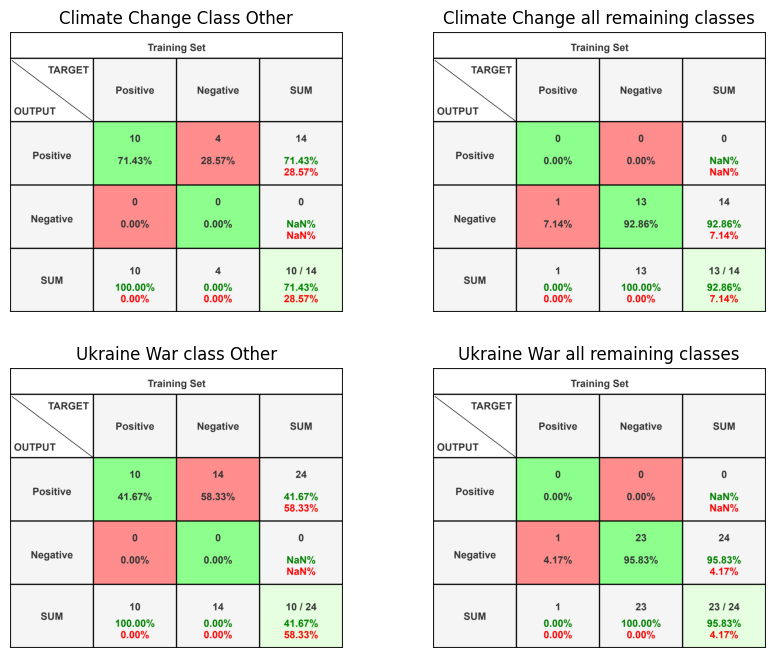

In [8]:
import matplotlib.pyplot as plt
images = ['cc_other.png', 'cc_all.png', 'ua_other.png', 'ua_all.png']
labels = ['Climate Change Class Other', 'Climate Change all remaining classes', 'Ukraine War class Other', 'Ukraine War all remaining classes']

fig, ax = plt.subplots(2, 2, figsize=(10, 8))
for i, (img_path, label) in enumerate(zip(images, labels)):
    row = i // 2
    col = i % 2
    img = plt.imread(img_path)
    ax[row, col].imshow(img)
    ax[row, col].axis('off')
    ax[row, col].set_title(label)
plt.show()

#### Climate Change

For Climate Change narratives, we received for class *Other* the following Confusion Matrix:
[[0, 4], [0, 10]]

Calculating the metrics for this specific class:
* Accuracy: 71,43 %
* Precision: 71,43 %
* Recall: 100%
* F1 Score: 83,33 %

For all other classes, we received the following equal Confusion Matrix:
[[13, 0], [1, 0]]
* Accuracy: 92,86 %
* Precision: 0 %
* Recall: 0%
* F1 Score: 0 %


#### Ukraine War

For Ukraine War narratives, we received for class *Other* the following Confusion Matrix:
[[0, 14], [0, 10]]

Calculating the metrics for this specific class:
* Accuracy: 41,7 %
* Precision: 41,7 %
* Recall: 100%
* F1 Score: 58,8%

For all other classes, we received the following equal Confusion Matrix:
[[23, 0], [1, 0]]
* Accuracy: 95,8%
* Precision: 0%
* Recall: 0%
* F1 Score: 0%


For both approaches, we can see that all classes except of *Other* have no counts for *True Positives*, but a very high count for *True Negatives*. On the hand, we have the class *Other*, where all samples of class *Other* are classified correctly as *Other*, but still we have almost as many or even more narratives that were classified as *Other*, although they had a different class.

From those unequally distributed results we see that BERTs' prediction performance is best for class *Other* and no other class.

An issue that could cause that, can be a data imbalance. The class *Other* occurs most frequently in the dataset. From that, the model could have learned to predict especially this class mostly accurately, while it fails for all other classes.

## Possible solutions
Although we have used stratification to receive a better distribution of all classes, there are still some solutions that we should consider in the next part.

Apperently, the class *Other* is overrepresented in the data set. Since we only had less than 200 narratives available, one possible solution to improve the predictions is to use more data.
In the context of this task we also have narratives in other languages available that we can use to handle the imbalance.Having more data.

The issue could also be that  the class labeling was not carried out cleanly, so that we have the broad class *Other*, where most of the narratives belong to. Specifying the classes more accurate could help to balance the dataset.



